## This notebook is simply for plotting transmission spectra from exotransmit 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

In [2]:
# Can be found in kipping/Exo_Transmit/Spectra
# as of 19 Jan 2024
spectra_path = '/Users/coffey/Downloads/kipping/Exo_Transmit/Spectra'

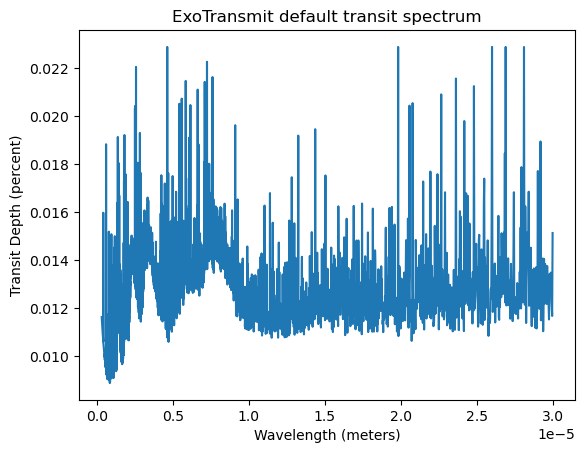

In [3]:
# default spectrum from Exo_Transmit
default_spec = np.loadtxt(f'{spectra_path}/default.dat', skiprows = 2).T

plt.title('ExoTransmit default transit spectrum')
plt.xlabel('Wavelength (meters)')
plt.ylabel('Transit Depth (percent)')

plt.plot(default_spec[0], default_spec[1])
plt.show()

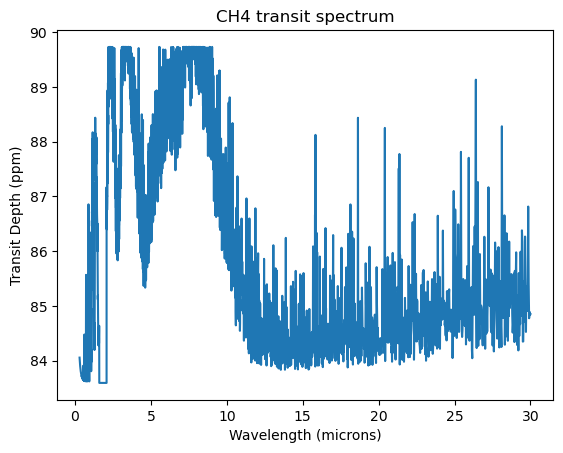

In [4]:
# sample run spectrum from Exo_Transmit
# only CH4, cloud pressure = 1000, planet gravity = 18, collision-induced off, scattering on

CH4_spec = np.loadtxt(f'{spectra_path}/transmission_CH4.dat', skiprows = 2).T

# converting wavelength values to microns, and transit depth to ppm
CH4_wavelength  = CH4_spec[0] * 1e6
CH4_trans_depth = CH4_spec[1] * 1e4
plt.title('CH4 transit spectrum')
plt.xlabel('Wavelength (microns)')
plt.ylabel('Transit Depth (ppm)')

plt.plot(CH4_wavelength, CH4_trans_depth)
plt.show()

### Reproducing spectrum in Lin et al. 2023

In [5]:
TOI1899b_spec        = np.loadtxt(f'{spectra_path}/transmission_TOI1899b.dat', skiprows = 2).T
TOI1899b_wavelength  = TOI1899b_spec[0] * 1e6 # microns

# reference lines for absolute transit depth (Rp/Rs)^2 
# from Cañas et al. 2020 and Lin et al. 2023 (in %)
canas = (0.194)**2 * 100; lin = (0.168)**2 * 100

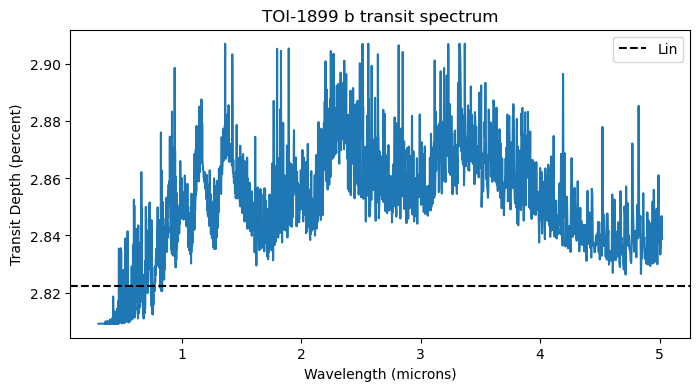

In [6]:
plt.figure(figsize = (8,4))
plt.title('TOI-1899 b transit spectrum')
plt.xlabel('Wavelength (microns)')
plt.ylabel('Transit Depth (percent)')

plt.plot(TOI1899b_wavelength[:2825], TOI1899b_spec[1][:2825])
plt.axhline(y = lin, xmin = 0, xmax = 1, ls = 'dashed', c = 'black', label = 'Lin')
#plt.axhline(y = canas, xmin = 0, xmax = 1, ls = 'dashed', c = 'black', label = 'Cañas')

plt.legend()
plt.show()

**Changing Rayleigh scattering**

Default in Exo-Transmit is 1, but Lin et al. assumes albedo of 0, meaning no Rayleigh scattering

In [7]:
TOI1899b_spec_0xray = np.loadtxt(f'{spectra_path}/transmission_TOI1899b_0xrayleigh.dat', skiprows = 2).T
TOI1899b_spec_1xray = np.loadtxt(f'{spectra_path}/transmission_TOI1899b_1xrayleigh.dat', skiprows = 2).T
TOI1899b_spec_100xray = np.loadtxt(f'{spectra_path}/transmission_TOI1899b_100xrayleigh.dat', skiprows = 2).T
TOI1899b_spec_1000xray = np.loadtxt(f'{spectra_path}/transmission_TOI1899b_1000xrayleigh.dat', skiprows = 2).T

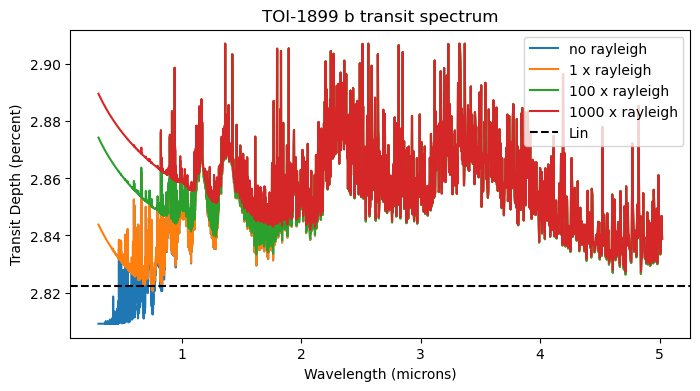

In [8]:
plt.figure(figsize = (8,4))
plt.title('TOI-1899 b transit spectrum')
plt.xlabel('Wavelength (microns)')
plt.ylabel('Transit Depth (percent)')

plt.plot(TOI1899b_wavelength[:2825], TOI1899b_spec_0xray[1][:2825], label = 'no rayleigh')
plt.plot(TOI1899b_wavelength[:2825], TOI1899b_spec_1xray[1][:2825], label = '1 x rayleigh')
plt.plot(TOI1899b_wavelength[:2825], TOI1899b_spec_100xray[1][:2825], label = '100 x rayleigh')
plt.plot(TOI1899b_wavelength[:2825], TOI1899b_spec_1000xray[1][:2825], label = '1000 x rayleigh')

plt.axhline(y = lin, xmin = 0, xmax = 1, ls = 'dashed', c = 'black', label = 'Lin')
#plt.axhline(y = canas, xmin = 0, xmax = 1, label = 'Cañas')

plt.legend()
plt.show()

**Adding clouds, but not changing planet radius**

In [9]:
# In Exo-Transmit, Rp is the planet radius at the base of the atmosphere for cloud-free calculations,
# but when clouds are included, Rp is the radius at the top of the cloud deck (Rp = Rp,true + Rclouds).
# All the light incident on this cross-sectional area will be completely blocked.
# For some reason I haven't figured out, as you include cloud decks at lower and lower pressures,
# the smaller the size of the atm calculated on top of that, so that the transit depth (coming from Rp + Ratm)
# is smaller for higher cloud decks. This is why the 0.1 mbar spectrum is lower than the 1mbar, which is lower than
# the cloud-free spectrum. To account for this, we can instead set the Rp in Exo-Transmit to be slightly higher
# when including clouds. I don't know how to choose what Rp is with clouds, but for now I just tuned it so that
# both cloud spectra line up with the top of the cloud-free spectrum. Also, to verify this, I took the Rp I fed 
# Exo-Transmit for each of these, and overlaid a line showing the corresponding transit depth, and as expected,
# it lines up with the flat bottoms of the cloud spectra.

In [10]:
TOI1899b_spec_1mbar = np.loadtxt(f'{spectra_path}/transmission_TOI1899b_1mbar.dat', skiprows = 2).T
TOI1899b_spec_0p1mbar = np.loadtxt(f'{spectra_path}/transmission_TOI1899b_0p1mbar.dat', skiprows = 2).T

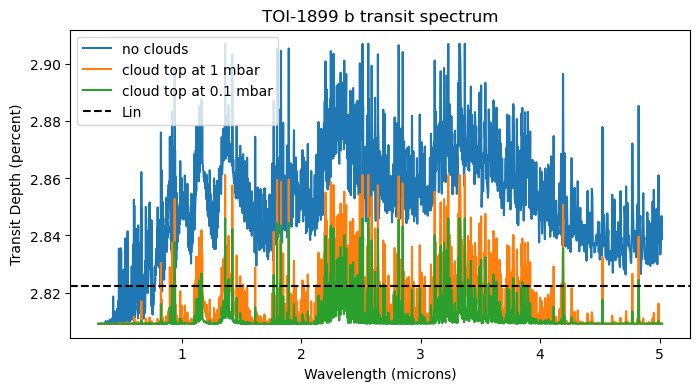

In [11]:
plt.figure(figsize = (8,4))
plt.title('TOI-1899 b transit spectrum')
plt.xlabel('Wavelength (microns)')
plt.ylabel('Transit Depth (percent)')

plt.plot(TOI1899b_wavelength[:2825], TOI1899b_spec[1][:2825], label = 'no clouds')
plt.plot(TOI1899b_wavelength[:2825], TOI1899b_spec_1mbar[1][:2825], label = 'cloud top at 1 mbar')
plt.plot(TOI1899b_wavelength[:2825], TOI1899b_spec_0p1mbar[1][:2825], label = 'cloud top at 0.1 mbar')

plt.axhline(y = lin, xmin = 0, xmax = 1, ls = 'dashed', c = 'black', label = 'Lin')
#plt.axhline(y = canas, xmin = 0, xmax = 1, label = 'Cañas')

plt.legend()
plt.show()

**Adding clouds, this time changing planet radius accordingly**

In [12]:
# Rp = 7.1345e7 & 7.1545e7 m
TOI1899b_spec_1mbar_diffrp = np.loadtxt(f'{spectra_path}/transmission_TOI1899b_1mbar_diffrp.dat', skiprows = 2).T
TOI1899b_spec_0p1mbar_diffrp = np.loadtxt(f'{spectra_path}/transmission_TOI1899b_0p1mbar_diffrp.dat', skiprows = 2).T

# Transit depths that line up with the flat bottoms of the cloud spectra
Rs = 4.2229e+08
Rp_1mbar   = 7.1345e7
Rp_0p1mbar = 7.1545e7

depth_1mbar   = (Rp_1mbar / Rs)**2 * 100
depth_0p1mbar = (Rp_0p1mbar / Rs)**2 * 100

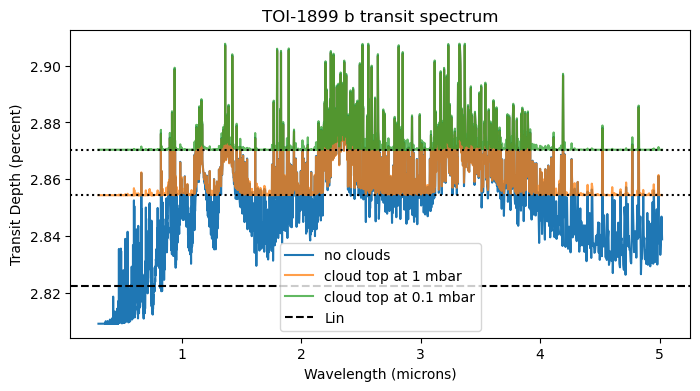

In [16]:
plt.figure(figsize = (8,4))
plt.title('TOI-1899 b transit spectrum')
plt.xlabel('Wavelength (microns)')
plt.ylabel('Transit Depth (percent)')

plt.plot(TOI1899b_wavelength[:2825], TOI1899b_spec[1][:2825], label = 'no clouds')
plt.plot(TOI1899b_wavelength[:2825], TOI1899b_spec_1mbar_diffrp[1][:2825], alpha = 0.75, label = 'cloud top at 1 mbar')
plt.plot(TOI1899b_wavelength[:2825], TOI1899b_spec_0p1mbar_diffrp[1][:2825], alpha = 0.75, label = 'cloud top at 0.1 mbar')

plt.axhline(y = lin, ls = 'dashed', c = 'black', label = 'Lin')
#plt.axhline(y = canas, xmin = 0, xmax = 1, label = 'Cañas')
plt.axhline(y = depth_1mbar, ls = 'dotted', c = 'black')
plt.axhline(y = depth_0p1mbar, ls = 'dotted', c = 'black')

plt.legend()
plt.show()

In [14]:
"""figure out temperature at which the molecules dissociate/can't exist

maybe make a little wrapper with that

look up article talking about molecules in low mass stars, maybe that'll give me some numbers

figure out what 

write definition for binning to resolution 100, figure out cloud stuff, then figure out ionization temps

"""

"figure out temperature at which the molecules dissociate/can't exist\n\nmaybe make a little wrapper with that\n\nlook up article talking about molecules in low mass stars, maybe that'll give me some numbers\n\nfigure out what \n\nwrite definition for binning to resolution 100, figure out cloud stuff, then figure out ionization temps\n\n"